# Canada Rent Prediction using Decision Tree Regressor

# 🏘️ Canada Rent Dataset (1987–2024)

This dataset provides historical rental data for various cities and provinces across Canada from 1987 to 2024. It includes details about rent prices, unit types, and geographic locations, which can be valuable for housing market analysis, rental trend forecasting, and urban planning studies.

## 🧾 Dataset Schema Overview

| Feature            | Data Type | Description                                                 |
|--------------------|-----------|-------------------------------------------------------------|
| **Province**        | object    | Canadian province where the rental unit is located          |
| **City**            | object    | City within the province                                    |
| **Year**            | int64     | Year of the rent data (from 1987 to 2024)                   |
| **AverageRent**     | int64     | Average monthly rent price in CAD                           |
| **UnitType**        | object    | Category of the rental unit (e.g., Apartment, Row House)    |
| **UnitDescription** | object    | Detailed description of the rental unit (e.g., 2 Bedroom)   |


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('Canada_Rent_1987-2024_NO_ZEROS1.csv', encoding='latin1')
df.head()

,Province,City,Year,AverageRent,UnitType,UnitDescription
0,Newfoundland and Labrador,Corner Brook,1987,480,Two bedroom units,Apartment structures of six units and over
1,Newfoundland and Labrador,Gander,1987,370,One bedroom units,Apartment structures of six units and over
2,Newfoundland and Labrador,Gander,1987,414,Two bedroom units,Apartment structures of six units and over
3,Newfoundland and Labrador,Gander,1987,414,Three bedroom units,Apartment structures of six units and over
4,Newfoundland and Labrador,Labrador City,1987,254,One bedroom units,Apartment structures of six units and over


## 📊 Exploratory Data Analysis (EDA) Report

For a detailed overview of the dataset, distributions, correlations, and other insights, check out the full EDA report here:

🔗 [Canada Rent EDA Report](https://kcracks.github.io/EDA_Reports/ydata/Canada_Report.html)


In [3]:
# Feature and target separation
X = df.drop(columns=["AverageRent"])
y = df["AverageRent"]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocessing: One-hot encode categorical features
categorical_features = ["Province", "City", "UnitType", "UnitDescription"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

In [26]:
# Decision Tree model with specified parameters
model = DecisionTreeRegressor(
    ccp_alpha=0.0,
    criterion='squared_error',
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=123,
    splitter='best'
)

In [27]:
# Create pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

In [28]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Province', 'City',
                                                   'UnitType',
                                                   'UnitDescription'])])),
                ('model', DecisionTreeRegressor(random_state=123))])

In [29]:
# Predict
y_pred = pipeline.predict(X_test)

In [34]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 2295.92
MAE: 20.17
RMSE: 47.92
R^2 Score: 0.9753


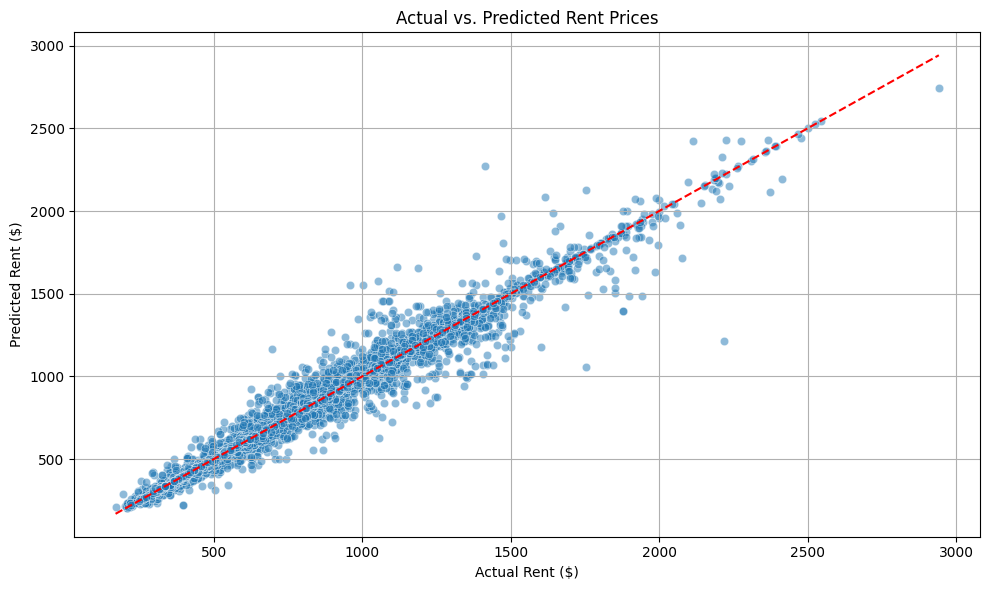

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rent ($)")
plt.ylabel("Predicted Rent ($)")
plt.title("Actual vs. Predicted Rent Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🏡 Rent Price Prediction - Model Evaluation Summary

## 📊 Model Performance Metrics

- **Mean Absolute Error (MAE):** 20.17  
  The average absolute difference between actual and predicted rent prices. On average, the model's predictions deviate from the actual rent price by approximately **$20.17**, indicating high accuracy.

- **Mean Squared Error (MSE):** 2295.92  
  This is the average of the squared differences between actual and predicted values. It penalizes larger errors more heavily and reflects the overall error magnitude across all predictions.

- **Root Mean Squared Error (RMSE):** 47.92  
  This is the square root of the MSE, and it brings the error metric back to the same unit as the target variable (rent in dollars). An RMSE of **$47.92** suggests that, on average, predictions are within about **$48** of the actual rent values.

- **R² Score:** 0.9753  
  The R² score indicates how well the model explains the variability of the target variable. An R² of **0.9753** means that **97.53%** of the variance in actual rent prices is explained by the model. This is an excellent result, showing strong predictive power.

---

✅ These metrics demonstrate that the model performs very well. The low error values (MAE, RMSE) and high R² score suggest that the model's predictions are highly reliable for tasks such as housing affordability analysis, rental forecasting, and real estate decision-making.

---

## 📈 Actual vs. Predicted Prices

The scatter plot above shows the relationship between actual rent prices and the predicted values. The close alignment of the points with the red diagonal line indicates a strong predictive match, with most predictions falling close to the true values.

---

## ✅ Conclusion

The regression model for predicting rent prices is accurate, robust, and suitable for practical applications in real estate analytics and rental market forecasting. Its performance metrics confirm its reliability and usefulness in real-world scenarios.
